# Laboratorio 2
### Entrega: martes 31 de agosto 2021, 23:59 horas


### Integrantes: 
- Francisco Levin
- Diego Mora

## Algunas Variables Aleatorias Especiales
En este laboratorio revisaremos algunos tipos de variables aleatorias especiales, definidas por que tienen  distribuciones de probabilidad conocidas. Trabajaremos tanto con v.a. discretas como continuas, y calcularemos y graficaremos las probabilidades teóricas (probabilidaes puntutales, funciones de  densidad y de distribución de probabilidad) y luego las vamos a comparar con datos obtenidos por simulación.

### Estadísticos asociados
1. Posición:  tendencia central y no central
   percentiles, media, moda

2. Dispersión: 
    Varianza, desviación estándar

3. Forma: 
    asimetría, curtosis. 
    
   $$\text{ Asimetría (skewness) }= \frac{E[(X-\mu)^3]}{\sigma^3}$$
   $$\text{ Curtosis }= \frac{E[(X-\mu)^4]}{\sigma^4} - 3$$

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
import scipy.stats as stats
import math

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.dpi'] = 200

from IPython.core.pylabtools import figsize


#### Distribución Bernoulli
Suponga que se realiza un ensayo cuya salida es "éxito" o "falla". La v.a. entonces tiene sólo dos valores posibles: 1 si "éxito" 0 si no. Si $p$ es la probabilidad de éxito, entonces:

$\begin{equation}
\begin{array}{lll} 
P(X=1) & = &p \qquad y \qquad P(X=0) = 1-p \\
P(X = i) & = & p^i (1-p)^{1-i} \,, i=0,1\\
E[X] & = & 1*p + 0*p = p\\
E[X^2] & = & 1*p + 0*p = p\\
Var(X) & = & E[X^2] - (E[X])^2 = p - p^2 = p(1-p)\\
\end{array}
\end{equation}$


#### Distribución Binomial
Suponga que se realizan $N$  ensayos independientes idénticos  Bernoulli  de parámetro $p$. La v.a. X que representa el número $k$ de ensayos existosos entre los $N$ ensayos realizados, se denomina Binomial y cumple:

$\begin{equation}
\begin{array}{lll} 
P(X=k) & = & {N \choose k} p^k (1-p)^{N-k}, \qquad k=0,1,...N \\
E[X] & = & Np\\
Var(X) & = & Np(1-p)\\
Simetria(X) & = & \frac{1-2p}{\sqrt{np(1-p)}}\\
Curtosis(X) & = & \frac{1-6p(1-p)}{np(1-p)}\\
\end{array}
\end{equation}$

### Simulación Variable Aleatoria con Distribución Binomial
En esta sección utilizaremos la función generadora de valores aleatorios para la distribución binomial, y se compara la distribución empírica con la distribución teórica

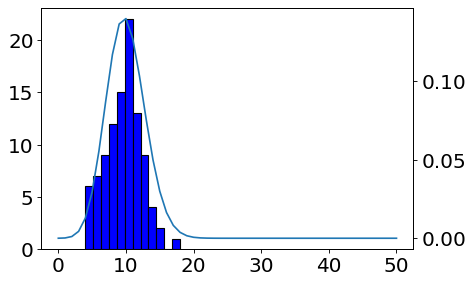

In [2]:
## simulación de size valores v.a. binomial
size=100
n=50
p=0.2
datos_bin =stats.binom.rvs(n=n, p=p, size=size) 
binwidth = 4
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=80)
ax.hist(datos_bin, color = 'blue', edgecolor = 'black', bins = int(50/binwidth))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(n+1))
##
pvec = []
for i in vec:
    pvec.append(stats.binom.pmf(k=i, n=n, p=p))
ax2.plot(vec,pvec)
plt.draw()


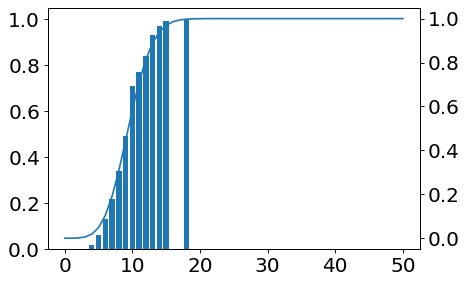

In [3]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_bin = ecdf(datos_bin)
ax.bar(x,cum_bin)
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(51))
##
pvec = []
for i in vec:
    pvec.append(stats.binom.cdf(k=i, n=n, p=p))
ax2.plot(vec,pvec)
plt.draw()


In [4]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_bin)/size
var_emp = sum((datos_bin - promedio)*(datos_bin-promedio))/size
asim = stats.skew(datos_bin)
curtos = stats.kurtosis(datos_bin)
print('esperanza empírica:',promedio,' teórica: ',n*p)
print('varianza empírica:',var_emp,' teórica: ', n*p*(1-p))
print('asimetría empírica:', asim, 'teórica: ',(1-2*p)/(math.sqrt(n*p*(1-p))))
print('curtosis empírico: ', curtos, 'teórico: ',(1-6*p*(1-p))/(n*p*(1-p)))

esperanza empírica: 9.55  teórica:  10.0
varianza empírica: 7.0074999999999985  teórica:  8.0
asimetría empírica: 0.2933283373158444 teórica:  0.21213203435596423
curtosis empírico:  0.08744440650141705 teórico:  0.004999999999999977


#### Ejercicio 1: 
1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)

### Respuesta

### 1.1

In [5]:
tol = 1e-2
sims = 100
esp = []
var = []
asim = []
curt = []
esp_teor = n*p
var_teor = n*p*(1-p)
asim_teor = (1-2*p)/(math.sqrt(n*p*(1-p)))
curt_teor = (1-6*p*(1-p))/(n*p*(1-p))

while sims <= 100000:
    datos_bin =stats.binom.rvs(n=n, p=p, size=sims)
    esp_emp = sum(datos_bin)/sims
    var_emp = sum((datos_bin - esp_teor)*(datos_bin - esp_teor))/sims
    asim_emp = stats.skew(datos_bin)
    curt_emp = stats.kurtosis(datos_bin)
    if((abs(esp_teor - esp_emp) < tol) and (abs(var_teor - var_emp) < tol) and (abs(asim_teor - asim_emp) < tol) and (abs(curt_teor - curt_emp) < tol)):
        break
    esp.append(esp_emp)
    var.append(var_emp)
    asim.append(asim_emp)
    curt.append(curt_emp)
    sims += 100

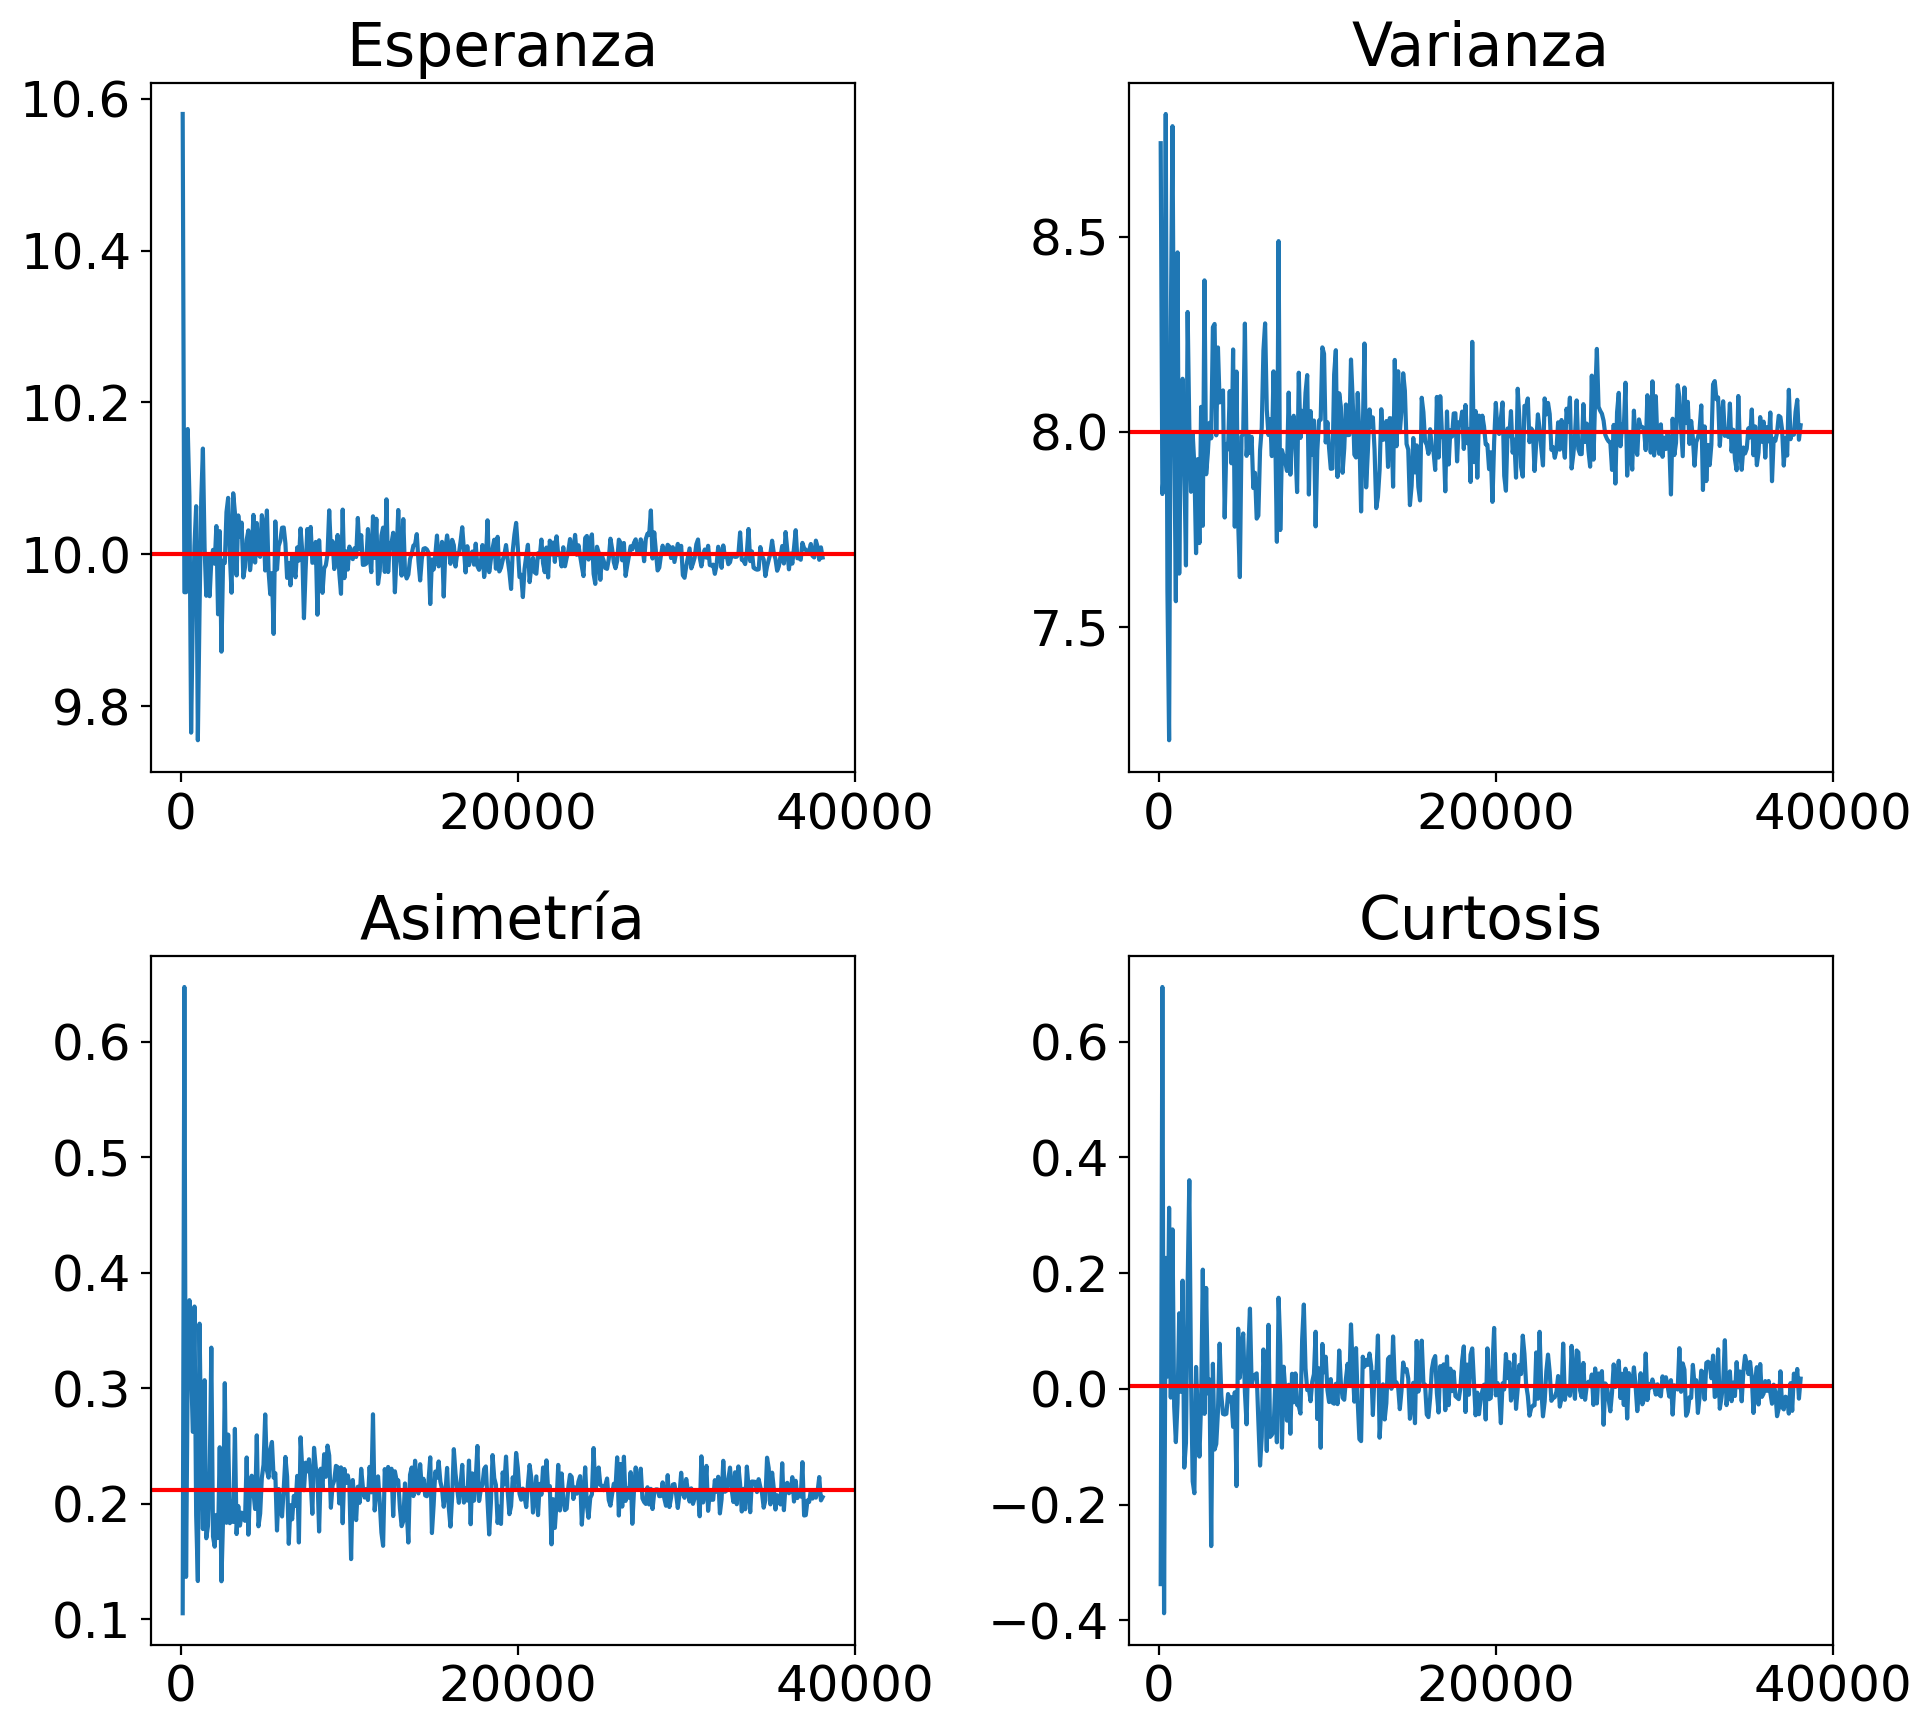

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(10,9))

x_sims = np.arange(100,sims,100)

axs[0, 0].plot(x_sims, esp)
axs[0, 0].axhline(y=esp_teor, color='r', linestyle='-', label='Esperanza teórica')
axs[0, 0].set_title('Esperanza')

axs[0, 1].plot(x_sims, var)
axs[0, 1].axhline(y=var_teor, color='r', linestyle='-', label='Varianza teórica')
axs[0, 1].set_title('Varianza')

axs[1, 0].plot(x_sims, asim)
axs[1, 0].axhline(y=asim_teor, color='r', linestyle='-', label='Asimetría teórica')
axs[1, 0].set_title('Asimetría')

axs[1, 1].plot(x_sims, curt)
axs[1, 1].axhline(y=curt_teor, color='r', linestyle='-', label='Curtosis teórica')
axs[1, 1].set_title('Curtosis')
fig.tight_layout()


In [7]:
print("Se requieren ",sims," simulaciones para acercarse a los valores teóricos")

Se requieren  38200  simulaciones para acercarse a los valores teóricos


De acuerdo al experimento se requieren aproximadamente 35200 simulaciones para que los valores empíricos de una distribución binomial se acerquen lo suficiente a los teóricos comparando los estadísticos esperanza, varianza, asimetría y curtosis dada una tolerancia de 1e-2.

### 1.2

Siguiendo el mismo procedimiento anterior, se calcula la cantidad de simulaciones para que los datos empíricos se asemejen a los teóricos variando los parámetros n y p.

In [8]:
# Función para evaluar los parámetros
def test_binom(p,n):    
    tol = 1e-2
    sims = 100
    esp = []
    var = []
    asim = []
    curt = []
    esp_teor = n*p
    var_teor = n*p*(1-p)
    asim_teor = (1-2*p)/(math.sqrt(n*p*(1-p)))
    curt_teor = (1-6*p*(1-p))/(n*p*(1-p))

    while sims <= 100000:
        datos_bin =stats.binom.rvs(n=n, p=p, size=sims)
        esp_emp = sum(datos_bin)/sims
        var_emp = sum((datos_bin - esp_teor)*(datos_bin - esp_teor))/sims
        asim_emp = stats.skew(datos_bin)
        curt_emp = stats.kurtosis(datos_bin)
        if((abs(esp_teor - esp_emp) < tol) and (abs(var_teor - var_emp) < tol) and (abs(asim_teor - asim_emp) < tol) and (abs(curt_teor - curt_emp) < tol)):
            break
        esp.append(esp_emp)
        var.append(var_emp)
        asim.append(asim_emp)
        curt.append(curt_emp)
        sims += 100
    if sims>100000:    
        print("Se requieren mas de ",sims," simulaciones para acercarse a los valores teóricos")
    else:
        print("Se requieren ",sims," simulaciones para acercarse a los valores teóricos")

In [9]:
# Valores de n y p a evaluar
probs = [0.1, 0.6, 0.9]
ns = [20, 50, 80]

#### Caso p = 0.1

In [10]:
test_binom(probs[0], ns[0])

Se requieren  9100  simulaciones para acercarse a los valores teóricos


In [11]:
test_binom(probs[0], ns[1])

Se requieren  18800  simulaciones para acercarse a los valores teóricos


In [12]:
test_binom(probs[0], ns[2])

Se requieren  23300  simulaciones para acercarse a los valores teóricos


#### Caso p = 0.6

In [13]:
test_binom(probs[1], ns[0])

Se requieren  19300  simulaciones para acercarse a los valores teóricos


In [14]:
test_binom(probs[1], ns[1])

Se requieren  29900  simulaciones para acercarse a los valores teóricos


In [15]:
test_binom(probs[1], ns[2])

Se requieren  49900  simulaciones para acercarse a los valores teóricos


#### Caso p = 0.9

In [16]:
test_binom(probs[2], ns[0])

Se requieren  19700  simulaciones para acercarse a los valores teóricos


In [17]:
test_binom(probs[2], ns[1])

Se requieren  17400  simulaciones para acercarse a los valores teóricos


In [18]:
test_binom(probs[2], ns[2])

Se requieren  25300  simulaciones para acercarse a los valores teóricos


Al ejecutar el experimento con diferentes valores para los parámetros n y p se obsevan resultados variados en cuanto a la cantidad de simulaciones requeridas. El mejor resultado se obtuvo con p = 0.6 y n = 20 donde se requieren aproximadamente 7500 simulaciones para compararse a los valores teóricos. Por otro lado, el peor resultado se obtuvo con p = 0.9 y n = 80, donde se requieren aproximadamente 41400 simulaciones para compararse a los valores teóricos.

#### Ejercicio 2: 
Realice un desarrollo similar al caso de la Distribución Binomial para el caso de una variable aleatoria con Distribución de Probabilidad Poisson

## 2)

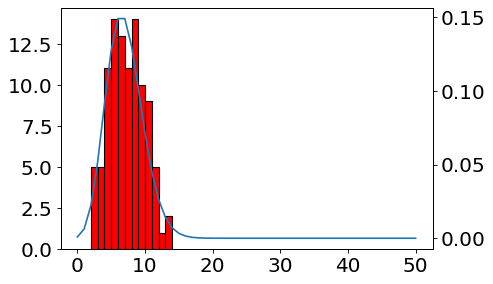

In [42]:

#Distribución de poisson 

size = 100
n = 50
mu_teorico = 7
datos_poisson_teor = stats.poisson.rvs(mu=mu_teorico, size=size) 
binwidth = 4
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=80)
ax.hist(datos_poisson_teor, color = 'red', edgecolor = 'black', bins = int(50/binwidth))

## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(n+1))
pvec = [stats.poisson.pmf(k=i, mu=mu_teorico) for i in vec]

ax2.plot(vec,pvec)
plt.draw()

[17, 6, 7]


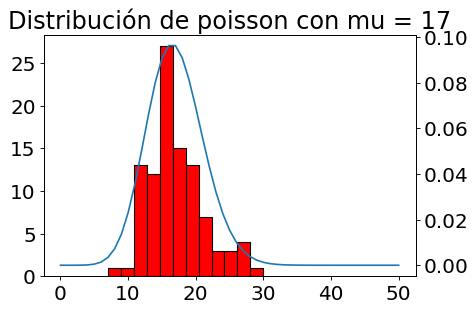

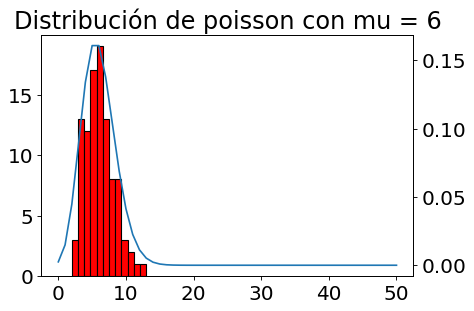

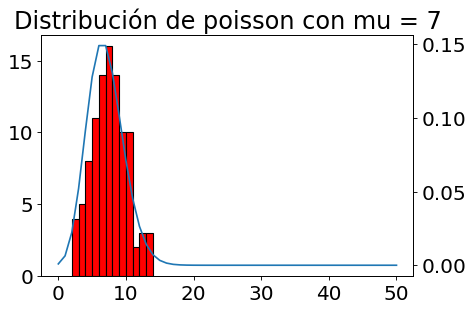

In [48]:
mu_arr = [random.randint(3, 20) for _ in range(3)]
print(mu_arr)

for i in mu_arr:
    datos_poisson = stats.poisson.rvs(mu=i, size=size) 
    fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=80)
    ax.hist(datos_poisson, color = 'red', edgecolor = 'black', bins = int(50/binwidth))
    ax.set_title("Distribución de poisson con mu = {}".format(i))

    ## probabilidad teórica
    ax2 = ax.twinx()
    vec = list(range(n+1))
    pvec = [stats.poisson.pmf(k=j, mu=i) for j in vec]

    ax2.plot(vec,pvec)
    plt.draw()


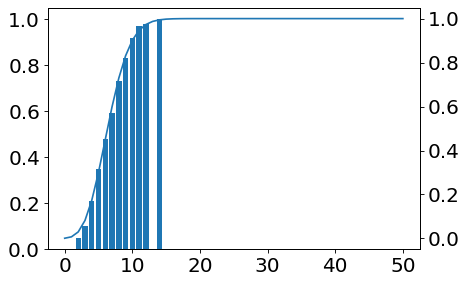

In [49]:
## gráfica de la distribución POISSON empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x, cum_poisson = ecdf(datos_poisson_teor)
ax.bar(x,cum_poisson)

## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(51))
pvec = [stats.poisson.cdf(k=i, mu=mu_teorico) for i in vec]

ax2.plot(vec,pvec)
plt.draw()


In [51]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_poisson_teor)/size
var_emp = sum((datos_poisson_teor - promedio) * (datos_poisson_teor - promedio))/size
asim = stats.skew(datos_poisson_teor)
curtos = stats.kurtosis(datos_poisson_teor)
print("*** Distribución de Poison ***")
print('esperanza empírica:',promedio,' teórica: ',n*p)
print('varianza empírica:',var_emp,' teórica: ', n*p*(1-p))
print('asimetría empírica:', asim, 'teórica: ',(1-2*p)/(math.sqrt(n*p*(1-p))))
print('curtosis empírico: ', curtos, 'teórico: ',(1-6*p*(1-p))/(n*p*(1-p)))

*** Distribución de Poison ***
esperanza empírica: 6.81  teórica:  10.0
varianza empírica: 7.0739000000000045  teórica:  8.0
asimetría empírica: 0.2683585571612259 teórica:  0.21213203435596423
curtosis empírico:  -0.32746697073834463 teórico:  0.004999999999999977


#### Distribución Normal o Gaussiana
Sea $X$ v.a. continua, es normal de media $\mu$ y varianza $\sigma^2$ y se denota $\cal{N}(\mu,\sigma^2)$ si su densidad de probabilidad cumple:


$\begin{equation}
\begin{array}{lll} 
f_X(x) & = & \frac{1}{\sqrt{2\pi}\sigma} exp(\frac{-(x-\mu)^2}{2\sigma^2})\qquad, -\infty < x <\infty\\
E[X] &= &\mu\\
Var(X)& =& \sigma^2\\
\end{array}
\end{equation}$

Esta es la distribución de probabilidad mas utilizada. Muchas variables se distribuyen aproximadamente normales (altura, peso, satisfacción en el trabajo, etc.). 

Permite modelar los errores o ruidos.

¿Cómo se verifica que una v.a. sigue una distribución normal?

Test de normalidad de Shapiro-Wilk, Q-Q plot


### Simulación Variable Aleatoria con Distribución Normal
En esta sección utilizaremos la función generadora de valores aleatorios para la distribución normal, y se compara la distribución empírica con la distribución teórica

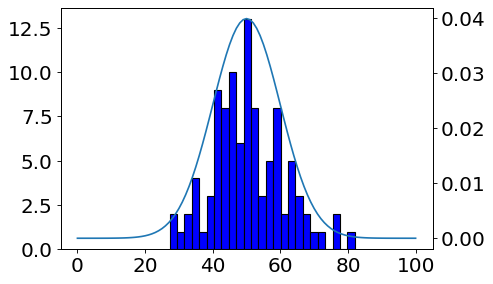

In [22]:
## simulación de size valores v.a. normal
size=100
mu=50
sigma=10
datos_norm =stats.norm.rvs(loc=mu, scale= sigma, size=size) 
binwidth = 4
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
ax.hist(datos_norm, color = 'blue', edgecolor = 'black', bins = int(2*mu/binwidth))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.norm.pdf(x=i, loc=mu, scale= sigma))
ax2.plot(vec,pvec)
plt.draw()


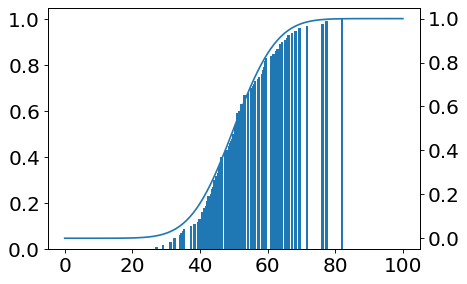

In [23]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_norm = ecdf(datos_norm)
ax.bar(x,cum_norm)
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.norm.cdf(x=i, loc=mu, scale=sigma))
ax2.plot(vec,pvec)
plt.draw()


In [24]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_norm)/size
var_emp = sum((datos_norm - promedio)*(datos_norm-promedio))/size
asim = stats.skew(datos_norm)
curtos = stats.kurtosis(datos_norm)
print('esperanza empírica:',promedio,' teórica: ',mu)
print('varianza empírica:',var_emp,' teórica: ', sigma*sigma)
print('asimetría empírica:', asim, 'teórica: ',0)
print('curtosis empírico: ', curtos, 'teórico: ',0)


esperanza empírica: 50.64392504558857  teórica:  50
varianza empírica: 113.63787513064248  teórica:  100
asimetría empírica: 0.38578547873923397 teórica:  0
curtosis empírico:  0.1583179204534586 teórico:  0


#### Ejercicio 3: 
1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)

### Respuesta

### 3.1

In [25]:
tol = 1e-2
sims=100
mu=50
sigma=10
datos_norm =stats.norm.rvs(loc=mu, scale= sigma, size=size) 

esp = []
var = []
asim = []
curt = []
esp_teor = mu
var_teor = sigma**2
asim_teor = 0
curt_teor = 0

while sims <= 200000:
    datos_norm =stats.norm.rvs(loc=mu, scale= sigma, size=sims) 
    esp_emp = sum(datos_norm)/sims
    var_emp = sum((datos_norm - esp_teor)*(datos_norm-esp_teor))/sims
    asim_emp = stats.skew(datos_norm)
    curt_emp = stats.kurtosis(datos_norm)
    if((abs(esp_teor - esp_emp) < tol) and (abs(var_teor - var_emp) < tol) and (abs(asim_teor - asim_emp) < tol) and (abs(curt_teor - curt_emp) < tol)):
        break
    esp.append(esp_emp)
    var.append(var_emp)
    asim.append(asim_emp)
    curt.append(curt_emp)
    sims += 100

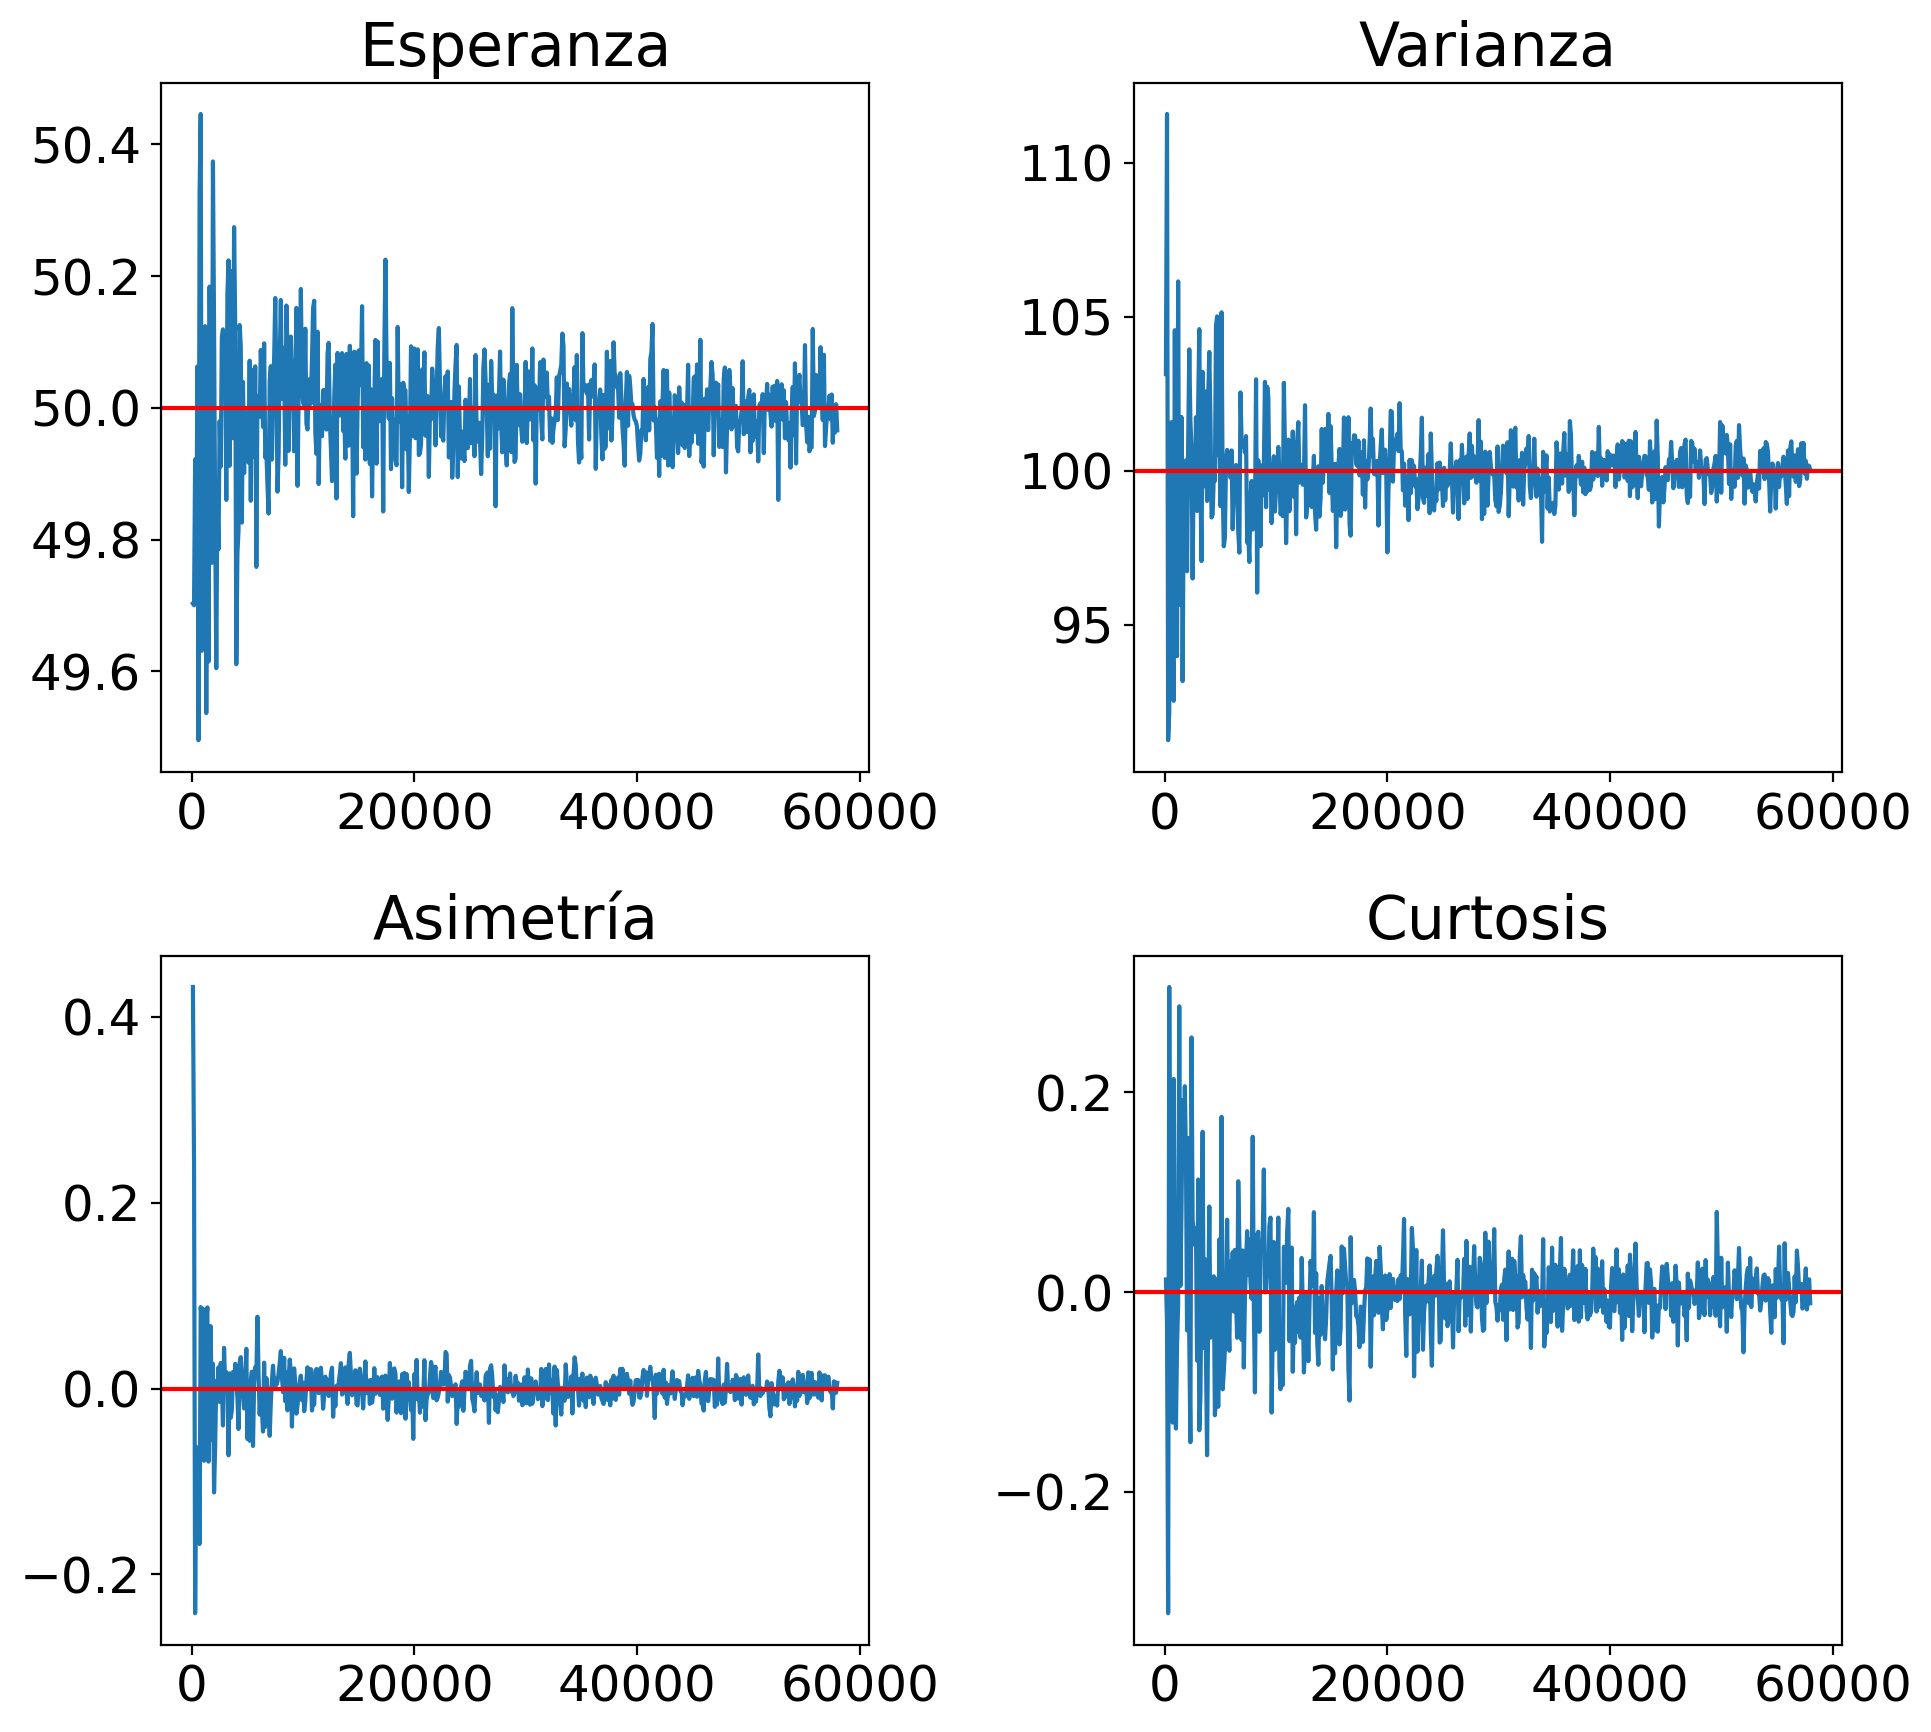

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(10,9))

x_sims = np.arange(100,sims,100)

axs[0, 0].plot(x_sims, esp)
axs[0, 0].axhline(y=esp_teor, color='r', linestyle='-', label='Esperanza teórica')
axs[0, 0].set_title('Esperanza')

axs[0, 1].plot(x_sims, var)
axs[0, 1].axhline(y=var_teor, color='r', linestyle='-', label='Varianza teórica')
axs[0, 1].set_title('Varianza')

axs[1, 0].plot(x_sims, asim)
axs[1, 0].axhline(y=asim_teor, color='r', linestyle='-', label='Asimetría teórica')
axs[1, 0].set_title('Asimetría')

axs[1, 1].plot(x_sims, curt)
axs[1, 1].axhline(y=curt_teor, color='r', linestyle='-', label='Curtosis teórica')
axs[1, 1].set_title('Curtosis')
fig.tight_layout()

In [27]:
print("Se requieren ",sims," simulaciones para acercarse a los valores teóricos")

Se requieren  58100  simulaciones para acercarse a los valores teóricos


De acuerdo al experimento se requieren aproximadamente 99700 simulaciones para que los valores empíricos de una distribución binomial se acerquen lo suficiente a los teóricos comparando los estadísticos esperanza, varianza, asimetría y curtosis dada una tolerancia de 1e-2.

### 3.2

Siguiendo el mismo procedimiento anterior, se calcula la cantidad de simulaciones para que los datos empíricos se asemejen a los teóricos variando los parámetros n y p.

In [28]:
# Función para evaluar los parámetros
def test_norm(mu, sigma):
    tol = 1e-2
    sims=100
    esp = []
    var = []
    asim = []
    curt = []
    esp_teor = mu
    var_teor = sigma**2
    asim_teor = 0
    curt_teor = 0

    while sims <= 200000:
        datos_norm =stats.norm.rvs(loc=mu, scale= sigma, size=sims) 
        esp_emp = sum(datos_norm)/sims
        var_emp = sum((datos_norm - esp_teor)*(datos_norm-esp_teor))/sims
        asim_emp = stats.skew(datos_norm)
        curt_emp = stats.kurtosis(datos_norm)
        if((abs(esp_teor - esp_emp) < tol) and (abs(var_teor - var_emp) < tol) and (abs(asim_teor - asim_emp) < tol) and (abs(curt_teor - curt_emp) < tol)):
            break
        esp.append(esp_emp)
        var.append(var_emp)
        asim.append(asim_emp)
        curt.append(curt_emp)
        sims += 100
    if sims>200000:    
        print("Se requieren mas de ",sims," simulaciones para acercarse a los valores teóricos")
    else:
        print("Se requieren ",sims," simulaciones para acercarse a los valores teóricos")    

In [29]:
# Valores de mu y sigma a evaluar
mus = [-2, 3, 10]
sigmas = [0.5, 10, 30]

#### Caso mu = -2

In [30]:
test_norm(mus[0], sigmas[0])

Se requieren  6100  simulaciones para acercarse a los valores teóricos


In [31]:
test_norm(mus[0], sigmas[1])

Se requieren  135300  simulaciones para acercarse a los valores teóricos


In [32]:
test_norm(mus[0], sigmas[2])

Se requieren mas de  200100  simulaciones para acercarse a los valores teóricos


#### Caso mu = 3

In [33]:
test_norm(mus[1], sigmas[0])

Se requieren  3700  simulaciones para acercarse a los valores teóricos


In [34]:
test_norm(mus[1], sigmas[1])

Se requieren  58700  simulaciones para acercarse a los valores teóricos


In [35]:
test_norm(mus[1], sigmas[2])

Se requieren mas de  200100  simulaciones para acercarse a los valores teóricos


#### Caso mu = 10

In [147]:
test_norm(mus[2], sigmas[0])

Se requieren  4400  simulaciones para acercarse a los valores teóricos


In [148]:
test_norm(mus[2], sigmas[1])

Se requieren  95900  simulaciones para acercarse a los valores teóricos


In [149]:
test_norm(mus[2], sigmas[2])

Se requieren mas de  200100  simulaciones para acercarse a los valores teóricos


Al ejecutar el experimento con diferentes valores para los parámetros mu y sigma se obsevan resultados variados en cuanto a la cantidad de simulaciones requeridas. El mejor resultado se obtuvo con mu = 10 y sigma = 0.5 donde se requieren aproximadamente 4400 simulaciones para compararse a los valores teóricos. Por otro lado, los peores resultados se obtuvieron con mu = -2 y sigma = 30, mu = 3 y sigma = 10 y por último mu = 10 y sigma = 10, en ninguno de estos tres casos se pudo estimar la cantidad de simulaciones necesarias, ya que el límite definido era 200000 y fue superado.

#### Ejercicio 4: 
Realice un desarrollo similar para el caso de una variable aleatoria continua distribuída chi-cuadrado de $k$ grados de libertad

## 4)

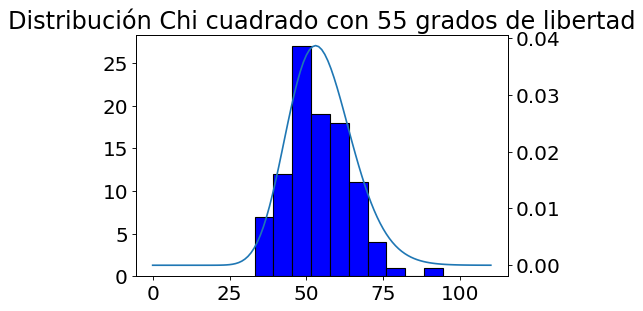

In [38]:
from random import randint 

size = 100
k_teorico = 55
k_arr = [randint(10,80) for _ in range(4)]  # grados de libertad aleatorios
sigma = 10
binwidth = 4

datos_chi2_teor = stats.chi2.rvs(df=k_teorico, size=size)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
ax.hist(datos_chi2_teor, color = 'blue', edgecolor = 'black')
ax.set_title("Distribución Chi cuadrado con {} grados de libertad".format(k_teorico))
    
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*k_teorico+1))
pvec = [stats.chi2.pdf(x=i, df=k_teorico) for i in vec]
ax2.plot(vec,pvec)
plt.draw()




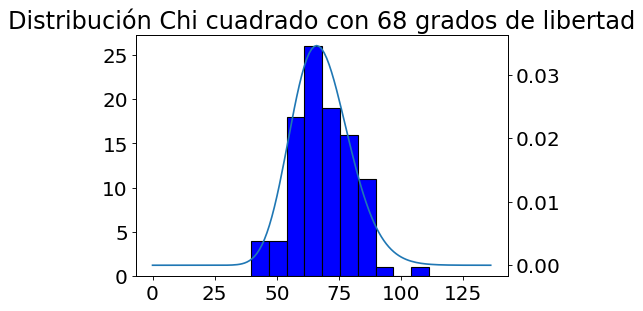

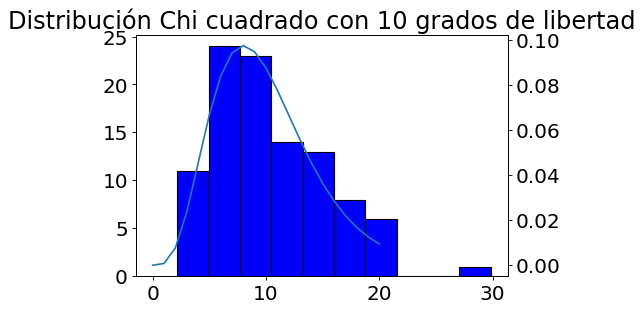

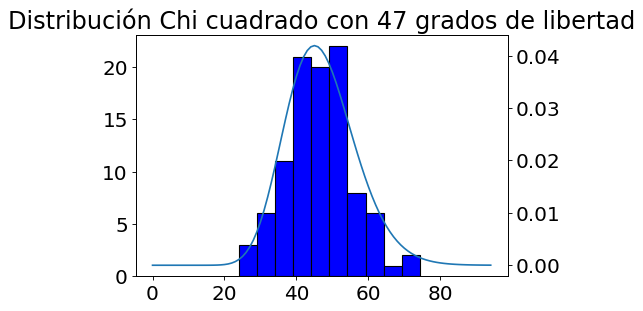

In [39]:
# Probando con distintos grados de libertad

from random import randint 

size = 100
k_arr = [randint(10,80) for _ in range(3)]  # grados de libertad aleatorios
sigma = 10
binwidth = 4

for x in k_arr :
    datos_chi2_emp = stats.chi2.rvs(df=x, size=size)
    fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
    ax.hist(datos_chi2_emp, color = 'blue', edgecolor = 'black')
    ax.set_title("Distribución Chi cuadrado con {} grados de libertad".format(x))
    
    ## probabilidad teórica
    ax2 = ax.twinx()
    vec = list(range(2*x+1))
    pvec = [stats.chi2.pdf(x=i, df=x) for i in vec]

    ax2.plot(vec,pvec)
    plt.draw()


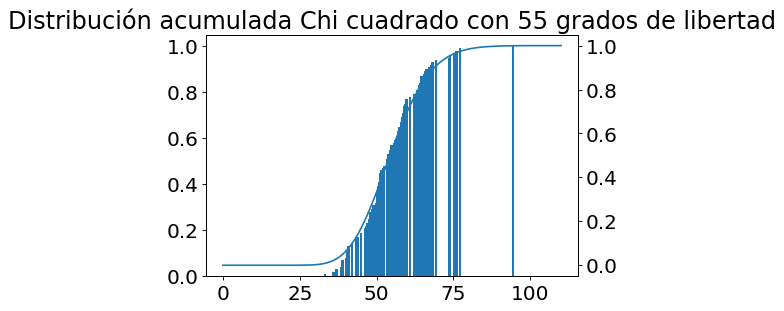

In [40]:
## gráfica de la distribución empírica Chi-cuadrado acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

        
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
x, cum_chi2 = ecdf(datos_chi2_teor)
ax.bar(x, cum_chi2)
ax.set_title("Distribución acumulada Chi cuadrado con {} grados de libertad".format(k_teorico))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2 * k_teorico+1))
pvec = [stats.chi2.cdf(x=i, df=k_teorico) for i in vec]
ax2.plot(vec,pvec)
plt.draw()




In [41]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_chi2_teor) / size
var_emp = sum((datos_chi2_teor - promedio) * (datos_chi2_teor - promedio)) / size
asim = stats.skew(datos_chi2_teor)
curtos = stats.kurtosis(datos_chi2_teor)
print("*** Distribución Chi-cuadrado ***")
print('esperanza empírica:', promedio,' teórica: ', k_teorico)
print('varianza empírica:',var_emp,' teórica: ', sigma*sigma)
print('asimetría empírica:', asim, 'teórica: ',0)
print('curtosis empírico: ', curtos, 'teórico: ',0)

*** Distribución Chi-cuadrado ***
esperanza empírica: 54.24493645148234  teórica:  55
varianza empírica: 107.45744079448605  teórica:  100
asimetría empírica: 0.6576134882521215 teórica:  0
curtosis empírico:  1.1787130798328231 teórico:  0


#### Ejercicio 5 (2 puntos):
Utilice datos de sismicidad del Centro de Sismológico Nacional (http://evtdb.csn.uchile.cl/events), escoja dos  regiones geográficas en Chile (y la región del océano Pacífico contigua), con dimensiones de al menos 5 grados, tanto en longitud como latitud y grafique los histogramas de magnitud y profundidad de los eventos sísmicos significativos disponibles. Calcule parámetros empíricos para cada serie de datos.  Compare y concluya.

## 5)

,lat,long,prof,mag
0,-23.13,-69.23,108,5.2
1,-20.74,-70.11,30,4.2
2,-20.46,-69.00,102,4.0
3,-20.28,-69.30,89,4.1
4,-21.49,-68.52,137,5.3
...,...,...,...,...
304,-23.15,-70.61,31,4.5
305,-22.99,-70.22,48,4.5
306,-20.23,-70.86,32,4.4
307,-22.56,-68.91,102,4.1


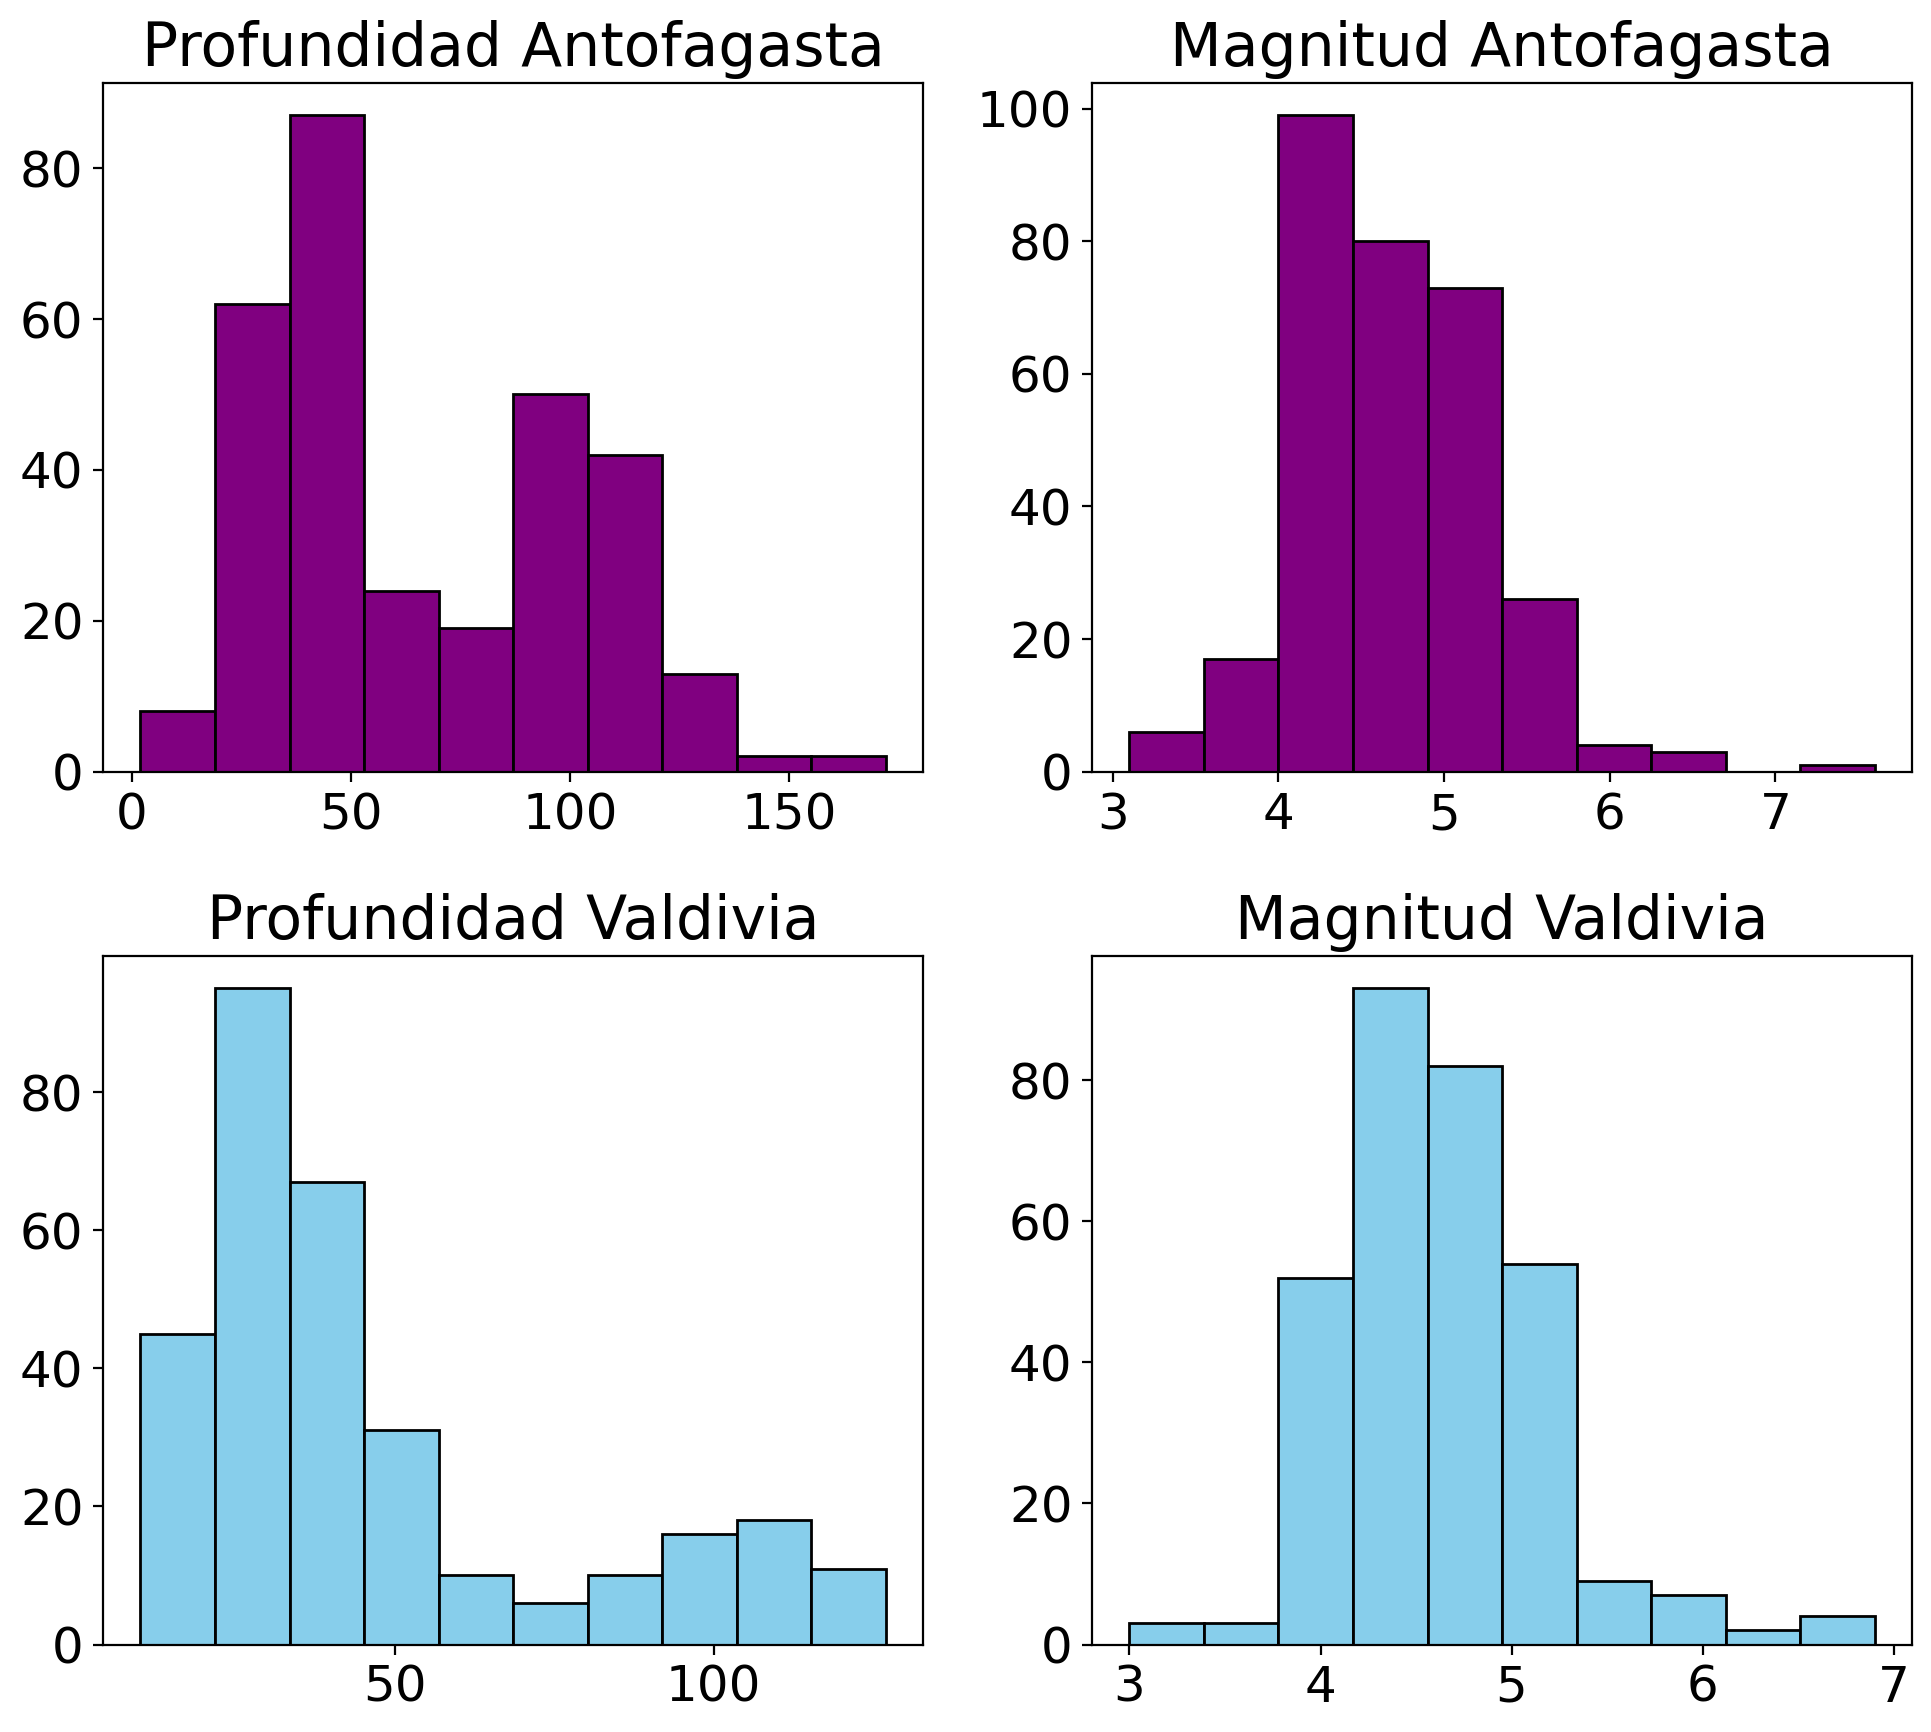

In [3]:
reg1 = pd.read_csv("data/antofagasta.csv", sep=";")[:309]
reg2 = pd.read_csv("data/valdivia.csv", sep=";")

prof_reg1 = reg1['prof']
mag_reg1 = reg1['mag']
prof_reg2 = reg2['prof']
mag_reg2 = reg2['mag']

display(reg1)

fig, axs = plt.subplots(2, 2, figsize=(10,9))

axs[0, 0].hist(prof_reg1, color = 'purple', edgecolor = 'black')
axs[0, 0].set_title('Profundidad Antofagasta')

axs[0, 1].hist(mag_reg1, color = 'purple', edgecolor = 'black')
axs[0, 1].set_title('Magnitud Antofagasta')

axs[1, 0].hist(prof_reg2, color = 'skyblue', edgecolor = 'black')
axs[1, 0].set_title('Profundidad Valdivia')

axs[1, 1].hist(mag_reg2, color = 'skyblue', edgecolor = 'black')
axs[1, 1].set_title('Magnitud Valdivia')

fig.tight_layout()



### Cálculo de parámetros empíricos

### Región 1: Valdivia

In [13]:
# Profundidad
esp_emp = prof_reg1.sum()/prof_reg1.size
var_emp = np.var(prof_reg1)
asim_emp = stats.skew(prof_reg1)
curt_emp = stats.kurtosis(prof_reg1)
print("Esperanza empírica: ",esp_emp)
print("Varianza empírica: ",var_emp)
print("Asimetría empírica: ",asim_emp)
print("Curtosis empírica: ",curt_emp)

Esperanza empírica:  65.0453074433657
Varianza empírica:  1245.0853258763525
Asimetría empírica:  0.4563242308382031
Curtosis empírica:  -1.029281053622597


In [5]:
# Magnitud
esp_emp = mag_reg1.sum()/mag_reg1.size
var_emp = np.var(mag_reg1)
asim_emp = stats.skew(mag_reg1)
curt_emp = stats.kurtosis(mag_reg1)
print("Esperanza empírica: ",esp_emp)
print("Varianza empírica: ",var_emp)
print("Asimetría empírica: ",asim_emp)
print("Curtosis empírica: ",curt_emp)

Esperanza empírica:  4.64789644012945
Varianza empírica:  0.34929169154072537
Asimetría empírica:  0.6799916789242445
Curtosis empírica:  1.62506076873684


En base a los parámetros calculados se puede concluir que en el sector de Valdivia en cuanto a profundidad es esperado que los sismos ocurran a aproxidamente 65 metros con una medida de dispersión relativamente alta lo que indica que los sismos varían mucho en profundidad. En cuanto a magnitud es esperable que ocurran sismos de alrededor de 4.64 grados en la escala de Richter. En cuanto a la dispersión de la magnitud es un valor bastante bajo lo que significa que la mayoría de sismos son de magnitud similar.

### Región 2: Antofagasta

In [14]:
# Profundidad
esp_emp = prof_reg2.sum()/prof_reg2.size
var_emp = np.var(prof_reg2)
asim_emp = stats.skew(prof_reg2)
curt_emp = stats.kurtosis(prof_reg2)
print("Esperanza empírica: ",esp_emp)
print("Varianza empírica: ",var_emp)
print("Asimetría empírica: ",asim_emp)
print("Curtosis empírica: ",curt_emp)

Esperanza empírica:  46.5210355987055
Varianza empírica:  910.9938940731662
Asimetría empírica:  1.205929385032738
Curtosis empírica:  0.28372533138739975


In [10]:
# Magnitud
esp_emp = mag_reg2.sum()/mag_reg2.size
var_emp = np.var(mag_reg2)
asim_emp = stats.skew(mag_reg2)
curt_emp = stats.kurtosis(mag_reg2)
print("Esperanza empírica: ",esp_emp)
print("Varianza empírica: ",var_emp)
print("Asimetría empírica: ",asim_emp)
print("Curtosis empírica: ",curt_emp)

Esperanza empírica:  4.6242718446601945
Varianza empírica:  0.30837527885128985
Asimetría empírica:  0.9553482535550443
Curtosis empírica:  2.280540970774572


En base a los parámetros calculados se puede concluir que en el sector de Antofagasta en cuanto a profundidad es esperado que los sismos ocurran a aproxidamente 46.52 metros con medida de dispersión moderada. En cuanto a magnitud es esperable que ocurran sismos de alrededor de 4.62 grados en la escala de Richter. En cuanto a la dispersión de la magnitud es 0.3, un valor bastante bajo lo que significa que la mayoría de sismos son de magnitud similar.

En general se puede concluir que ambas regiones tienen registros telúricos muy similares a pesar de ubicarse en zonas muy distantes.

### Referencias

https://github.com/WillKoehrsen/Data-Analysis/blob/master/univariate_dist/Histogram%20and%20Density%20Plot.ipynb
